# <b>GRIP: The Sparks Foundation

<b>Data Science and Business Analytics Intern

<b>Author : Km Varsha

<b>Task 1 : Prediction Using Supervised ML

<b>In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the number of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

In [15]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#reading data from given url
df = pd.read_csv("http://bit.ly/w-data")

<b>Exploring the dataset

In [17]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
 df.shape

(25, 2)

In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
#checking the null values in the given dataset
df.isnull().values.any()

False

In [21]:
#checking the duplicate values in the given dataset

df.duplicated().values.any()

False

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<b> Plotting the relation between both dependent and independent variables

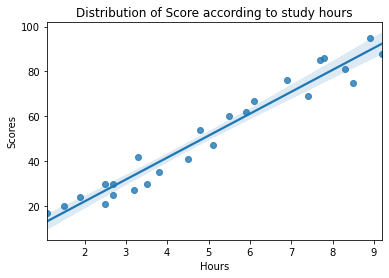

In [23]:
sns.regplot(x=df['Hours'], y =df['Scores']);
plt.title("Distribution of Score according to study hours")
plt.show()

Observation: By regplot we can clearly see their is a linear relationship between the two variables.

<b>Detecting Outliers by using Boxplot

Text(0.5, 0, 'Scores')

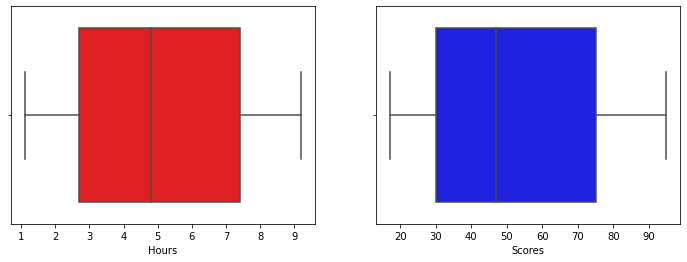

In [42]:
plt.rcParams['figure.figsize'] = (12,4)
plt.subplot(121)
sns.boxplot(df['Hours'], color ='red')
plt.xlabel('Hours')

plt.subplot(122)
sns.boxplot(df['Scores'], color ='blue')
plt.xlabel('Scores')


Observation: From Boxplot, we can see that their is no ouliers in the given dataset.

In [43]:
x = df[['Hours']]  #independent variable
y = df['Scores']   #dependent varible

In [44]:
# Splitting dataset into training and testing data

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.20,random_state =0)

<b> Model Implementation

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [46]:
reg.fit(x_train,y_train)

LinearRegression()

In [47]:
reg.score(x_test,y_test)

0.9454906892105356

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [49]:
predictions = reg.predict(x_train)

<b> Plotting actual values with the predicted values for training dataset

Text(0.5, 1.0, 'LinearRegression Model')

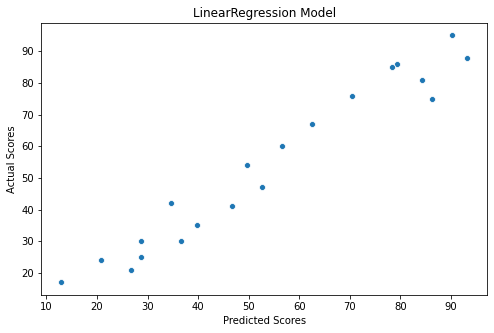

In [50]:
plt.rcParams['figure.figsize'] = (8,5)
actual_values = y_train
sns.scatterplot(x=predictions, y= actual_values);
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.title('LinearRegression Model')

In [51]:
forecast = reg.predict(x_test)
print("Predicted Scores according to study hours:", forecast)

Predicted Scores according to study hours: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


<b>Comparing Actual values VS Predicted values for Test dataset

In [52]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': forecast})
data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


<b>Model Evaluation

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, forecast))
print('MSE:', metrics.mean_squared_error(y_test, forecast))

MAE: 4.183859899002975
MSE: 21.5987693072174


<b>What would be the predicted score if a student studies for 9.25 hours/day?

In [54]:
hours = [[9.25]]
given_data_pred = reg.predict(hours)
print("According to the given hours = {}".format(hours))
print("The predicted Score is = {}".format(given_data_pred[0]))

According to the given hours = [[9.25]]
The predicted Score is = 93.69173248737538
